# Task 1.2: Prediction with LSTM

In [1]:
from src.load_data import get_data
from src.train import FederatedLearning
from src.config import Config, load_train_config

import torch
torch.manual_seed(102)

## Specify parameters

### Manually set config

In [2]:
kwargs = {
    # Main mode
    "mode": "prediction",

    # Model config
    "model": "LSTM",
    # "hidden_dim": 32,
    "num_layers": 1,
    "dropout": 0.0,

    # Training config
    "epochs": 300,
    "lr": 0.01,
    "batch_size": 128
}

config = Config(**kwargs)

In [3]:
# Save config
# config.save("default_pred_lstm")

### Load saved config

In [4]:
config = load_train_config("config_default_pred_lstm")
print(config)

Config loaded from: config/config_default_pred_lstm.json
CONFIG:
  mode: prediction
  test_size: 0.2
  val_size: 0.1
  shuffle: True
  seed: 42
  model: LSTM
  input_dim: 1
  hidden_dim: 32
  output_dim: 1
  num_layers: 1
  dropout: 0.0
  epochs: 300
  lr: 0.01
  batch_size: 128
  eval_steps: 50


## Run FL training

In [5]:
x_train, x_val, x_test, y_train, y_val, y_test = get_data(config)

In [6]:
fl = FederatedLearning(config)
fl.train(x_train, y_train, x_val, y_val)

TRAIN:
  Epoch: 1,  train loss: 129.55534, val loss: 638.50745
  Epoch: 50,  train loss: 62.87041, val loss: 230.04056
  Epoch: 100,  train loss: 13.51545, val loss: 118.25043
  Epoch: 150,  train loss: 20.17764, val loss: 75.83957
  Epoch: 200,  train loss: 15.06169, val loss: 60.92371
  Epoch: 250,  train loss: 13.84726, val loss: 54.46943
  Epoch: 300,  train loss: 17.97072, val loss: 52.02229
  Needed  0.75 minutes for training


NOTE: Execution time of LSTM a bit longer than of RNN!

### Analysis

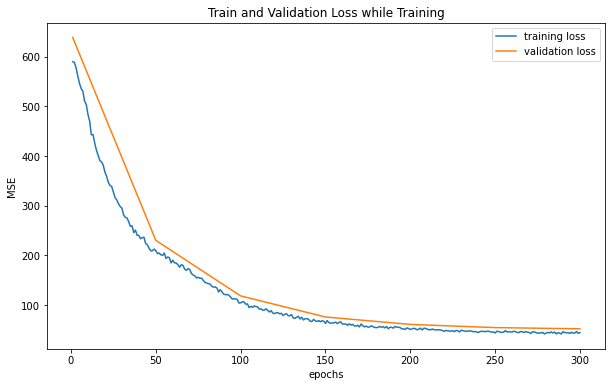

In [7]:
fl.plot_training_loss()

In [ ]:
# TODO add "simulation plot": "show the predicted output vs. ground truth during the model training and testing"

In [8]:
fl.evaluation_metrics(x_test, y_test)

METRICS:
  Test MSE: 49.83134078979492


## Run training with aggregated data

In [9]:
x_train, x_val, x_test, y_train, y_val, y_test = get_data(config)

# Stack data to aggregate all households to one
x_train, x_val, x_test = [arr.reshape(1, arr.shape[0] * arr.shape[1], arr.shape[2]) for arr in [x_train, x_val, x_test]]
y_train, y_val, y_test = [arr.reshape(1, arr.shape[0] * arr.shape[1]) for arr in [y_train, y_val, y_test]]

In [10]:
fl_agg = FederatedLearning(config)
fl_agg.train(x_train, y_train, x_val, y_val)

TRAIN:
  Epoch: 1,  train loss: 575.78003, val loss: 635.85101
  Epoch: 50,  train loss: 190.44710, val loss: 215.10326
  Epoch: 100,  train loss: 78.85513, val loss: 99.62312
  Epoch: 150,  train loss: 60.02374, val loss: 69.22307
  Epoch: 200,  train loss: 37.88784, val loss: 58.68724
  Epoch: 250,  train loss: 30.95305, val loss: 53.58411
  Epoch: 300,  train loss: 39.22298, val loss: 52.55176
  Needed  0.02 minutes for training


### Analysis

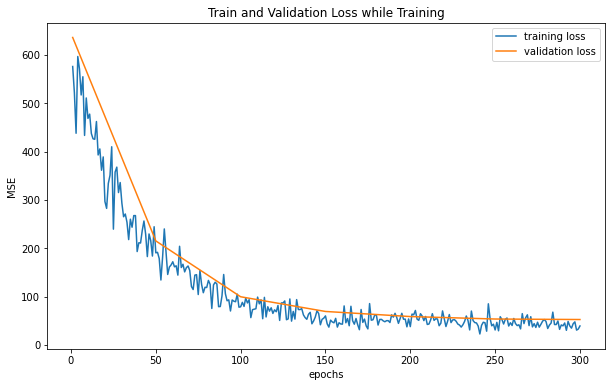

In [11]:
fl_agg.plot_training_loss()

In [12]:
fl_agg.evaluation_metrics(x_test, y_test)

METRICS:
  Test MSE: 50.28449630737305
